<a href="https://colab.research.google.com/github/ElektroDuck/PID-controller-symulation/blob/main/PID%20simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Simulation of the PID control law for a bicycle kinematic model

## Short description
Starting from the bicycle kinematic model represented by the image it has been developed a python symulation of the PID behaviur.

## Goal
The ultimate goal of this notebook is to create a system that allow the bicycle to follow the green line and then simulate it.  


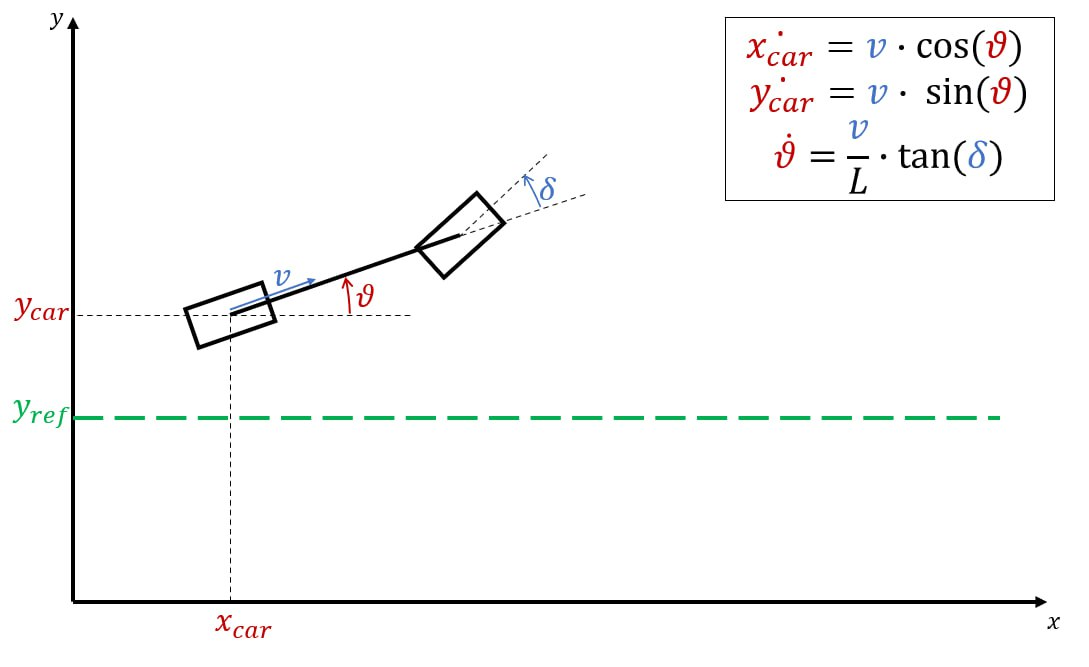


## Brief explanation
To controll the bicycle a [PID controller](https://en.wikipedia.org/wiki/Proportional–integral–derivative_controller) has been used.
This kind of controller is widely used in industrial control systems and a variety of other applications requiring continuously modulated control.

PIS systems use the error e(t) of the system to automatically apply accurate and responsive correction to a control function

## Controll Law of the system
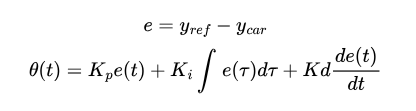


# Implementation and simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation
from IPython.display import Image

### Implementation of the dynamics of the system and pid controller

In [2]:
# Define the system dynamics of the system
def system_dynamics(state, t, u, L):
    x, y, theta = state
    v, delta = u
    dxdt = v * np.cos(theta)
    dydt = v * np.sin(theta)
    dthetadt = v / L * np.tan(delta)
    return [dxdt, dydt, dthetadt]

# Define the PID controller
def pid_controller(y_ref, y, prev_e, integral, Kp, Ki, Kd, dt):
    e = y_ref - y
    integral += e * dt
    derivative = (e - prev_e) / dt
    u = Kp * e + Ki * integral + Kd * derivative
    return u, e, integral

### Definition of the simulation parameters

In [3]:
# Define the simulation parameters

#bicicle parameters
L = 2  #length
y_ref = 1  # reference line

#initial conditions
initial_x = 0
initial_y = 0
initial_theta = 0

#Pid settings
#Kp, Ki, Kd = 1, 0.1, 0.5  # starting PID gains
#Kp, Ki, Kd = 1, 0.1, 4  # better one PID gains
Kp, Ki, Kd = 3, 0.5, 4 # really good one

#Time settings
dt = 0.01  # time step
T = 100  # total simulation time

### Symulation and graphs plotting

In [4]:
# Initialize variables
state = [initial_x, initial_y, initial_theta]  # initial state [x, y, theta]
u = [1, 0]  # initial control input [v, delta]
prev_e = y_ref - state[1]
integral = 0

# Create a time array for simulation
t = np.arange(0, T, dt)

# Create arrays to store the states and control inputs for plotting
x_arr = []
y_arr = []
theta_arr = []
v_arr = []
delta_arr = []

# Run the simulation
for ti in t:
    # Append the current state and control input to the arrays
    x_arr.append(state[0])
    y_arr.append(state[1])
    theta_arr.append(state[2])
    v_arr.append(u[0])
    delta_arr.append(u[1])

    # Update the control input using the PID controller
    u[1], prev_e, integral = pid_controller(y_ref, state[1], prev_e, integral, Kp, Ki, Kd, dt)

    # Update the state using the system dynamics
    state = odeint(system_dynamics, state, [ti, ti+dt], args=(u, L))[-1]

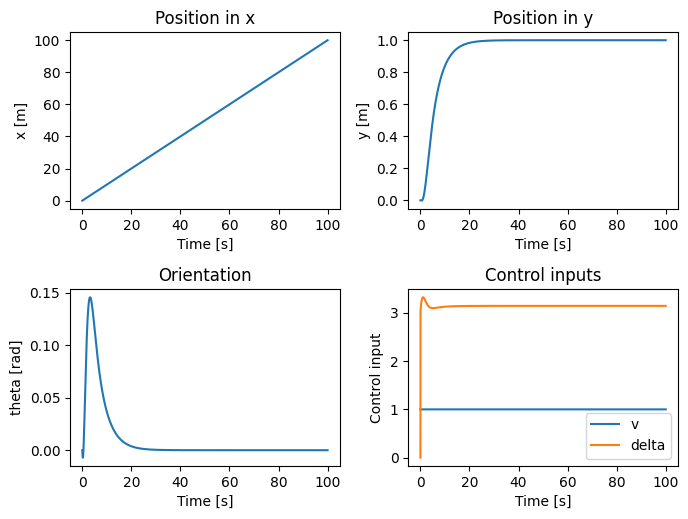

In [5]:
# Plot the results
plt.figure(figsize=(7, 10))
plt.subplot(4, 2, 1)
plt.plot(t, x_arr)
plt.xlabel('Time [s]')
plt.ylabel('x [m]')
plt.title('Position in x')

plt.subplot(4, 2, 2)
plt.plot(t, y_arr)
plt.xlabel('Time [s]')
plt.ylabel('y [m]')
plt.title('Position in y')

plt.subplot(4, 2, 3)
plt.plot(t, theta_arr)
plt.xlabel('Time [s]')
plt.ylabel('theta [rad]')
plt.title('Orientation')

plt.subplot(4, 2, 4)
plt.plot(t, v_arr, label='v')
plt.plot(t, delta_arr, label='delta')
plt.xlabel('Time [s]')
plt.ylabel('Control input')
plt.title('Control inputs')
plt.legend()

plt.tight_layout()
plt.show()

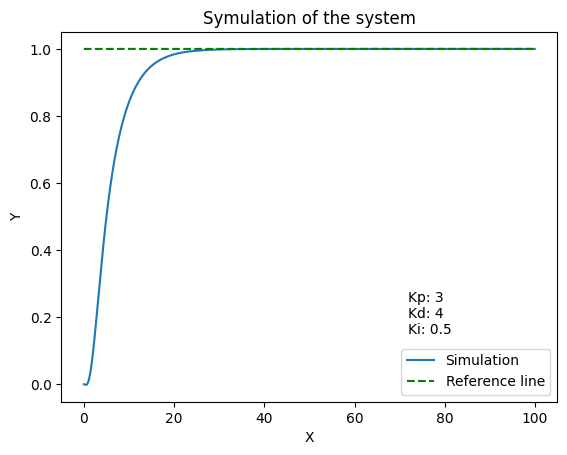

In [6]:
# Final symulation
green_line = np.zeros_like(t) + y_ref

plt.plot(x_arr, y_arr)
plt.plot(x_arr, green_line, 'g--')
plt.legend(['Simulation', 'Reference line'])  # Add a legend

#display the kp, kd, ki on the graph
plt.text(0.7, 0.3, f'Kp: {Kp}\nKd: {Kd}\nKi: {Ki}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Symulation of the system')
plt.show()

### Animated symulation

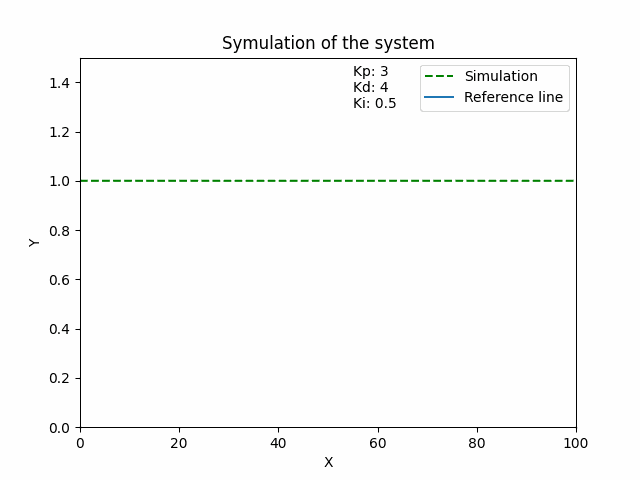

In [7]:
fig, ax = plt.subplots()

#plot a straight line on y_ref
green_line = np.zeros_like(t) + y_ref
ax.plot(x_arr, green_line, 'g--')

line1, = ax.plot(initial_x, initial_y)


# Set the labels on the graph
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Symulation of the system')

# Set the axes limits
ax.set_xlim(0, 100)
ax.set_ylim(0, max(y_arr) + 0.5)

plt.legend(['Simulation', 'Reference line'])  # Add a legend

#display the kp, kd, ki on the graph
plt.text(0.55, 0.98, f'Kp: {Kp}\nKd: {Kd}\nKi: {Ki}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')


# Create an animation function
def animate(i):
    idx = i * 100
    line1.set_xdata(x_arr[:idx])  # aggiorna i dati x
    line1.set_ydata(y_arr[:idx])  # aggiorna i dati y
    return line1,

# Create the animation
ani = animation.FuncAnimation(
    fig, animate, interval=1, blit=True, save_count= 100)


#save the animation
ani.save(filename=f"pid_animation_{Kp}_{Ki}_{Kd}.gif", writer="pillow")

#avoid showing the graph twice
plt.close()

#show the animation
Image(open(f'pid_animation_{Kp}_{Ki}_{Kd}.gif','rb').read())